In [30]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [31]:
encoded_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoded_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

In [32]:
# Encoder Model
encoder = Model(input_img, encoded)
encoder.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [33]:
# This is a reconstruction model
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Decoder Model
encoded_input = Input(shape=(encoded_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
decoder.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [35]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [37]:
x_train = x_train.reshape(len(x_train),784)/255.
x_test = x_test.reshape(len(x_test),784)/255.
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [38]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [39]:
autoencoder.fit(x_train, x_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1910
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1200
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1035
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0971
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0952
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0945
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0942
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0940
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0938
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0937


In [40]:
encoded_imgs=encoder.predict(x_test)
print(encoded_imgs.shape)

(10000, 32)


In [41]:
reconst_imgs = decoder.predict(encoded_imgs)
print(reconst_imgs.shape)

(10000, 784)


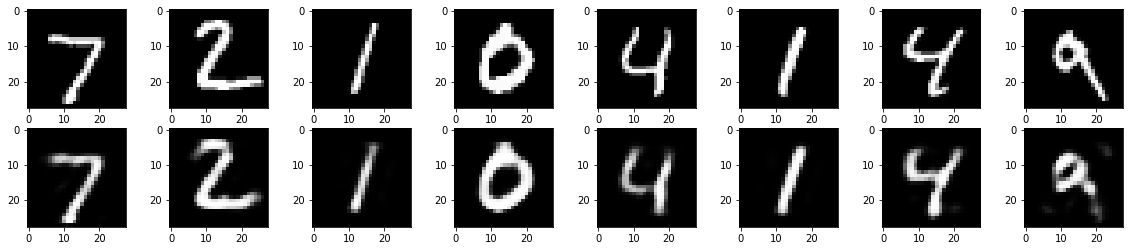

In [42]:
plt.figure(figsize=(20,4))
n = 8
for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.subplot(2,n,i+1+n)
    plt.imshow(reconst_imgs[i].reshape(28,28), cmap='gray')
plt.show()